In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('df11_new.csv')

In [3]:
data.head()

,gender,age,job,marital,province,city,prefer,frequency,wineFrequency,side,...,choice1_과일향,choice1_오크향,choice1_깊이,choice1_견고함,choice2_당도,choice2_알콜 농도,choice2_과일향,choice2_오크향,choice2_깊이,choice2_견고함
0,MALE,50대,중소기업직원,MARREID,부산시,해운대구,당도,5,4,Annon,...,M,H,H,H,M,H,M,H,H,H
1,FEMALE,30대,연구원,SINGLE,경상도,하동군,깊이감,2,1,Roquefort,...,H,M,L,L,H,L,H,M,L,M
2,FEMALE,30대,자영업,MARREID,부산시,사하구,깊이감,4,1,Cheddar,...,H,M,L,M,L,H,H,H,M,M
3,FEMALE,40대,자영업,MARREID,부산시,사하구,당도,1,1,Gorgonzola,...,H,M,L,L,H,L,H,M,L,M
4,FEMALE,40대,의사,MARREID,서울시,강남구,깊이감,1,1,Gorgonzola,...,H,M,M,M,H,L,H,M,M,M


In [4]:
to_drop = [category for category in data.columns if (category.startswith('choice1_') or (category.startswith('choice2_') or (category == 'seq')))]
data.drop(to_drop, axis = 1, inplace = True)

In [5]:
data.head()

,gender,age,job,marital,province,city,prefer,frequency,wineFrequency,side,choice1,area_grade,choice2
0,MALE,50대,중소기업직원,MARREID,부산시,해운대구,당도,5,4,Annon,A,1급지,A
1,FEMALE,30대,연구원,SINGLE,경상도,하동군,깊이감,2,1,Roquefort,D,5급지,B
2,FEMALE,30대,자영업,MARREID,부산시,사하구,깊이감,4,1,Cheddar,B,2급지,G
3,FEMALE,40대,자영업,MARREID,부산시,사하구,당도,1,1,Gorgonzola,D,2급지,B
4,FEMALE,40대,의사,MARREID,서울시,강남구,깊이감,1,1,Gorgonzola,C,1급지,C


In [6]:
df_list = list()
for choice in sorted(data['choice1'].unique()):
    df_list.append(data[data['choice1'] == choice])

In [7]:
tmp = pd.concat(df_list[1:])
tmp = tmp.sample(frac=1).reset_index(drop=True)
tmp.head()

,gender,age,job,marital,province,city,prefer,frequency,wineFrequency,side,choice1,area_grade,choice2
0,FEMALE,40대,변호사,MARREID,서울시,강동구,깊이감,4,1,Camenbert,D,2급지,E
1,FEMALE,40대,변호사,MARREID,서울시,강남구,당도,3,2,Camenbert,D,1급지,B
2,FEMALE,20대,학생,MARREID,충청도,청주시,당도,3,2,Cheddar,F,1급지,B
3,MALE,40대,회사직원,SINGLE,부산시,사하구,깊이감,3,1,Ricotta,H,2급지,F
4,MALE,40대,임시직,MARREID,부산시,연제구,당도,3,1,Camenbert,D,4급지,F


In [8]:
tmp['choice1'] = 0

In [9]:
dfa = df_list[0].copy()
dfa['choice1'] = 1
tmp = tmp.loc[:len(dfa.index), :]
dfa = pd.concat([dfa, tmp])
dfa.head()

,gender,age,job,marital,province,city,prefer,frequency,wineFrequency,side,choice1,area_grade,choice2
0,MALE,50대,중소기업직원,MARREID,부산시,해운대구,당도,5,4,Annon,1,1급지,A
14,MALE,50대,기자,MARREID,서울시,강남구,당도,1,1,Cheddar,1,1급지,D
29,MALE,50대,임시직,SINGLE,충청도,청주시,당도,1,1,Camenbert,1,1급지,E
40,MALE,30대,중소기업직원,MARREID,부산시,사하구,깊이감,1,1,Brie,1,2급지,C
45,FEMALE,40대,임시직,SINGLE,충청도,청주시,깊이감,3,1,Brie,1,1급지,G


In [10]:
df_x = pd.get_dummies(dfa.drop('choice1', axis = 1, inplace = False))
df_y = dfa[['choice1']]
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3)
tree = DecisionTreeClassifier(random_state=777)
tree.fit(df_train_x, df_train_y)
tree.score(df_test_x, df_test_y)

0.6194331983805668

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
estimator = DecisionTreeClassifier()

para_depth = [depth for depth in range(1, 16)]
para_split = [split * 2 for split in range(1, 11)]
para_leaf = [leaf for leaf in range(5, 30)]

param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print(f'best model:\n{grid_dt.best_estimator_}')
print(f'best parameter:\n{grid_dt.best_params_}')
print(f'best score:\n{grid_dt.best_score_.round(3)}')

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
best parameter:
{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}
best score:
0.727


In [13]:
grid_dt.score(df_test_x, df_test_y)

0.708502024291498

In [14]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=12, random_state=777)
tree.fit(df_train_x, df_train_y)
tree.score(df_test_x, df_test_y)

0.7044534412955465

In [15]:
from sklearn.tree import export_graphviz

In [16]:
import graphviz

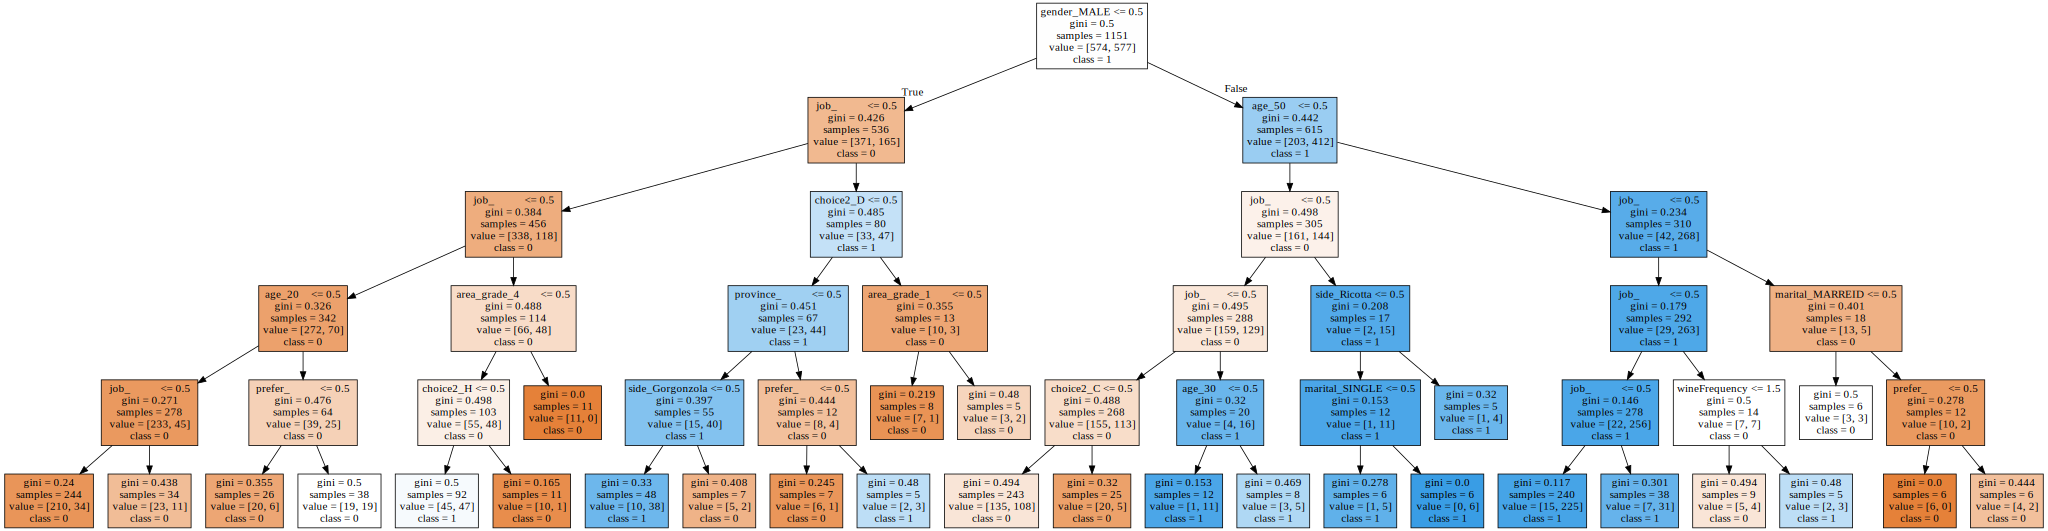

In [17]:
export_graphviz(tree, out_file='dfa.dot', class_names=list(map(str, df_train_y['choice1'].unique())), feature_names = df_train_x.columns, impurity = True, filled = True)
with open('dfa.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [18]:
dfa

,gender,age,job,marital,province,city,prefer,frequency,wineFrequency,side,choice1,area_grade,choice2
0,MALE,50대,중소기업직원,MARREID,부산시,해운대구,당도,5,4,Annon,1,1급지,A
14,MALE,50대,기자,MARREID,서울시,강남구,당도,1,1,Cheddar,1,1급지,D
29,MALE,50대,임시직,SINGLE,충청도,청주시,당도,1,1,Camenbert,1,1급지,E
40,MALE,30대,중소기업직원,MARREID,부산시,사하구,깊이감,1,1,Brie,1,2급지,C
45,FEMALE,40대,임시직,SINGLE,충청도,청주시,깊이감,3,1,Brie,1,1급지,G
69,MALE,50대,회사직원,MARREID,부산시,해운대구,깊이감,1,1,Annon,1,1급지,F
79,MALE,50대,회사직원,MARREID,부산시,해운대구,깊이감,2,1,Camenbert,1,1급지,H
80,MALE,50대,연구원,MARREID,부산시,사하구,깊이감,2,1,Gorgonzola,1,2급지,G
119,FEMALE,40대,자영업,MARREID,부산시,해운대구,깊이감,5,1,Valencay,1,1급지,C
134,MALE,40대,벤처직원,MARREID,서울시,강동구,당도,3,1,Annon,1,2급지,B


In [19]:
dfa = df_list[0].copy()
dfa['choice1'] = 1
tmp = tmp.loc[:len(dfa.index), :]
dfa = pd.concat([dfa, tmp])
dfa.head()

df_x = pd.get_dummies(dfa.loc[:, ['gender', 'age', 'marital']])
df_y = dfa[['choice1']]
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3)
tree = DecisionTreeClassifier(random_state=777)
tree.fit(df_train_x, df_train_y)
tree.score(df_test_x, df_test_y)

estimator = DecisionTreeClassifier()

para_depth = [depth for depth in range(1, 16)]
para_split = [split * 2 for split in range(1, 11)]
para_leaf = [leaf for leaf in range(5, 30)]

param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print(f'best model:\n{grid_dt.best_estimator_}')
print(f'best parameter:\n{grid_dt.best_params_}')
print(f'best score:\n{grid_dt.best_score_.round(3)}')

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
best parameter:
{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
best score:
0.676


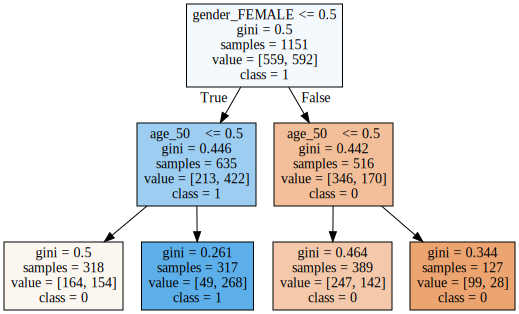

In [20]:
tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=2, random_state=777)
tree.fit(df_train_x, df_train_y)
tree.score(df_test_x, df_test_y)
export_graphviz(tree, out_file='dfa_.dot', class_names=list(map(str, df_train_y['choice1'].unique())), feature_names = df_train_x.columns, impurity = True, filled = True)
with open('dfa_.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [21]:
tmp = pd.concat([df_list[0], df_list[1],df_list[2],df_list[4],df_list[5],df_list[6],df_list[7]])
tmp = tmp.sample(frac=1).reset_index(drop=True)
tmp['choice1'] = 0

In [22]:
dfd = df_list[3].copy()
dfd['choice1'] = 1
tmp = tmp.loc[:len(dfd.index), :]
dfd = pd.concat([dfd, tmp])

df_x = pd.get_dummies(dfd.loc[:, ['gender', 'age', 'job']])
df_y = dfd[['choice1']]
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3)

estimator = DecisionTreeClassifier()

para_depth = [depth for depth in range(1, 16)]
para_split = [split * 2 for split in range(1, 11)]
para_leaf = [leaf for leaf in range(5, 30)]

param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print(f'best model:\n{grid_dt.best_estimator_}')
print(f'best parameter:\n{grid_dt.best_params_}')
print(f'best score:\n{grid_dt.best_score_.round(3)}')

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
best parameter:
{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
best score:
0.688


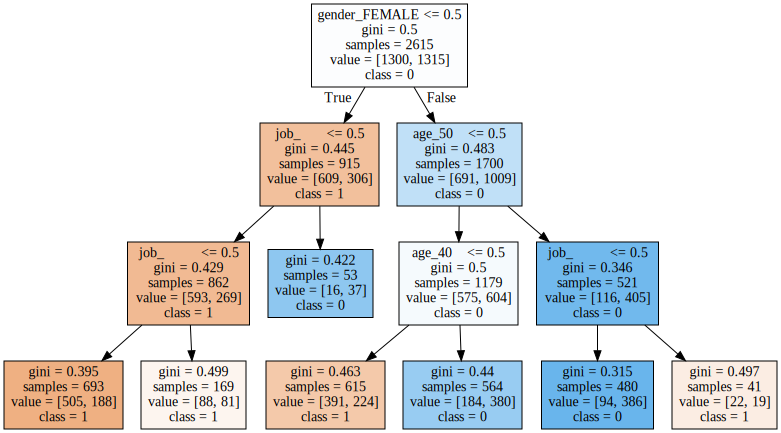

In [23]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=27, min_samples_split=2, random_state=777)
tree.fit(df_train_x, df_train_y)
tree.score(df_test_x, df_test_y)
export_graphviz(tree, out_file='dfd_.dot', class_names=list(map(str, df_train_y['choice1'].unique())), feature_names = df_train_x.columns, impurity = True, filled = True)
with open('dfd_.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [24]:
tmp = pd.concat([df_list[0], df_list[2],df_list[3],df_list[4],df_list[5],df_list[6],df_list[7]])
tmp = tmp.sample(frac=1).reset_index(drop=True)
tmp['choice1'] = 0

In [25]:
dfb = df_list[1].copy()
dfb['choice1'] = 1
tmp = tmp.loc[:len(dfb.index), :]
dfb = pd.concat([dfb, tmp])

df_x = pd.get_dummies(dfb.loc[:, ['gender', 'age', 'marital']])
df_y = dfb[['choice1']]
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3)

estimator = DecisionTreeClassifier()

para_depth = [depth for depth in range(1, 16)]
para_split = [split * 2 for split in range(1, 11)]
para_leaf = [leaf for leaf in range(5, 30)]

param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print(f'best model:\n{grid_dt.best_estimator_}')
print(f'best parameter:\n{grid_dt.best_params_}')
print(f'best score:\n{grid_dt.best_score_.round(3)}')

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
best parameter:
{'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 2}
best score:
0.632


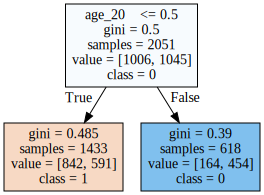

In [26]:
tree = DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=2, random_state=777)
tree.fit(df_train_x, df_train_y)
tree.score(df_test_x, df_test_y)
export_graphviz(tree, out_file='dfb_.dot', class_names=list(map(str, df_train_y['choice1'].unique())), feature_names = df_train_x.columns, impurity = True, filled = True)
with open('dfb_.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [27]:
tmp = pd.concat([df_list[0], df_list[1], df_list[2],df_list[3],df_list[4],df_list[5],df_list[6],])
tmp = tmp.sample(frac=1).reset_index(drop=True)
tmp['choice1'] = 0

In [28]:
dfh = df_list[7].copy()
dfh['choice1'] = 1
tmp = tmp.loc[:len(dfh.index), :]
dfh = pd.concat([dfh, tmp])

df_x = pd.get_dummies(dfh.loc[:, ['age', 'marital']])
df_y = dfh[['choice1']]
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 777)

estimator = DecisionTreeClassifier()

para_depth = [depth for depth in range(1, 16)]
para_split = [split * 2 for split in range(1, 11)]
para_leaf = [leaf for leaf in range(5, 30)]

param_grid = {'max_depth':para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = 'accuracy', n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print(f'best model:\n{grid_dt.best_estimator_}')
print(f'best parameter:\n{grid_dt.best_params_}')
print(f'best score:\n{grid_dt.best_score_.round(3)}')

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
best parameter:
{'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 2}
best score:
0.562


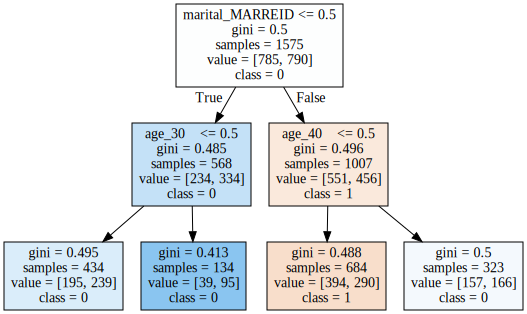

In [29]:
tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=2, random_state=777)
tree.fit(df_train_x, df_train_y)
tree.score(df_test_x, df_test_y)
export_graphviz(tree, out_file='dfh_.dot', class_names=list(map(str, df_train_y['choice1'].unique())), feature_names = df_train_x.columns, impurity = True, filled = True)
with open('dfh_.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [30]:
len(data[data['choice1'] == 'H'])

1125